# <center> Machine learning</center>
## <center> Introduction et quelques examples pour le sport </center>
### <center> Dimension reduction </center>


### <center> École d'été <span style="font-variant:small-caps;">Sciences</span><sup>2024</sup> Édition 2023</center>



<center> Rémi Carmigniani</center>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition,manifold
from sklearn.neighbors import NearestNeighbors,KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from scipy.interpolate import griddata

# Exemple sur une courbe

In [49]:
def func(t):
    return np.array([t*np.cos(3*t),t*np.sin(3*t)])
def datapoint(t,func,noise=0.1):
    '''
    return a data point generated by func with some noise with range noise
    '''
    x_tab =  func(t)
    noise_tab  =t*np.random.uniform(low=-noise, high=noise, size=x_tab.shape)
    return x_tab+noise_tab

In [50]:
y_tab.shape

(2, 101)

In [51]:
y_tab = datapoint(np.random.rand(500),func).transpose()
y_tab = np.append(y_tab,[np.array([-0.2,0.3])],axis=0).transpose()
t_tab = np.arange(0,1,0.01)
y_original = func(t_tab)
embedding = manifold.Isomap(n_components=1,n_neighbors=5)
X_transformed = embedding.fit_transform(y_tab.transpose())
t_r_tab = np.arange(np.min(X_transformed)-0.2,np.max(X_transformed)+0.2,0.01)
data = y_tab.transpose()
embedded_points = X_transformed

In [52]:
k_neighbors=5
# Choose a point in the embedded space for inverse transformation

embedded_point = embedded_points[0]  # Example point, change as needed
def inverse_transform_func(embedded_point,embedded_points,data,k_neighbors=7):
    knn = NearestNeighbors(n_neighbors=k_neighbors)
    knn.fit(embedded_points)
    # Find the k nearest neighbors in the embedded space
    distances, indices = knn.kneighbors(embedded_point.reshape(1, -1), n_neighbors=k_neighbors)
    indices = indices.flatten()
    indices=indices[:]#remove fist
    # Get the coordinates of the k nearest neighbors and the corresponding original data
    k_nearest_points = embedded_points[indices]
    k_nearest_data = data[indices]
    #print(indices)
    # Perform piecewise linear interpolation
    linear_regressor = LinearRegression()
    linear_regressor.fit(k_nearest_points, k_nearest_data)
    inverse_transformed_point =  linear_regressor.predict(embedded_point.reshape(-1, 1))
    return inverse_transformed_point
def inverse_transform_func_list(embedded_point,embedded_points,data,k_neighbors=7):
    inverse_transformed_list=[]
    for i in range(len(embedded_point)):
        inverse_transformed_list.append(inverse_transform_func(embedded_point[i],embedded_points,data,k_neighbors).flatten())
    return np.array(inverse_transformed_list)

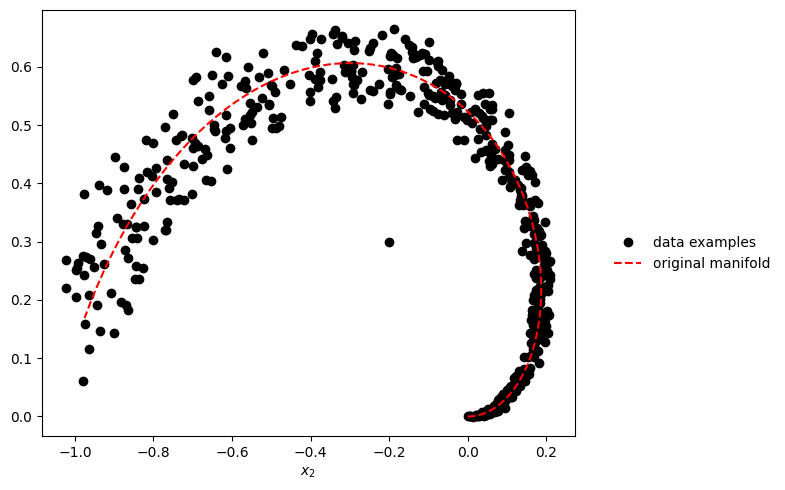

In [53]:
plt.figure(figsize=(8,5))
plt.plot(y_tab[0,:],y_tab[1,:],'ok',label='data examples')
plt.plot(y_original[0,:],y_original[1,:],'--r',label='original manifold')
plt.xlabel('$x_1$')
plt.xlabel('$x_2$')
plt.legend(bbox_to_anchor=(1.05, .5),loc='upper left',frameon=False)
plt.tight_layout()
plt.savefig('../../Presentations/img/courbe_para.png')

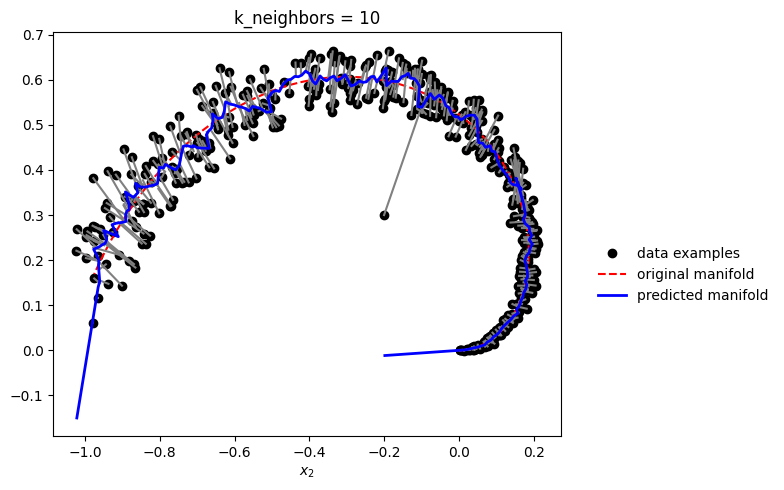

In [54]:
k_neighbors=10
plt.figure(figsize=(8,5))
plt.plot(y_tab[0,:],y_tab[1,:],'ok',label='data examples')
plt.plot(y_original[0,:],y_original[1,:],'--r',label='original manifold')

for i in range(len(y_tab[0])):
    embedded_point = embedding.transform(y_tab[:,i].reshape(1,-1))
    inverse_transform_point = inverse_transform_func(embedded_point,embedded_points,data,k_neighbors=k_neighbors).flatten()
    plt.plot([y_tab[0,i],inverse_transform_point[0]],[y_tab[1,i],inverse_transform_point[1]],'-',color='gray')
    #print(inverse_transform_point)
y_pred = inverse_transform_func_list(t_r_tab,embedded_points,data,k_neighbors=k_neighbors)
#plt.plot(y_pred_2[:,0],y_pred_2[:,1],'-',color='orange',label='predicted manifold',lw=2)
plt.plot(y_pred[:,0],y_pred[:,1],'-b',label='predicted manifold',lw=2)
plt.xlabel('$x_1$')
plt.xlabel('$x_2$')
plt.legend(bbox_to_anchor=(1.05, .5),loc='upper left',frameon=False)
plt.title('k_neighbors = %d'%k_neighbors)
plt.tight_layout()
plt.savefig('../../Presentations/img/courbe_para_prediction.png')

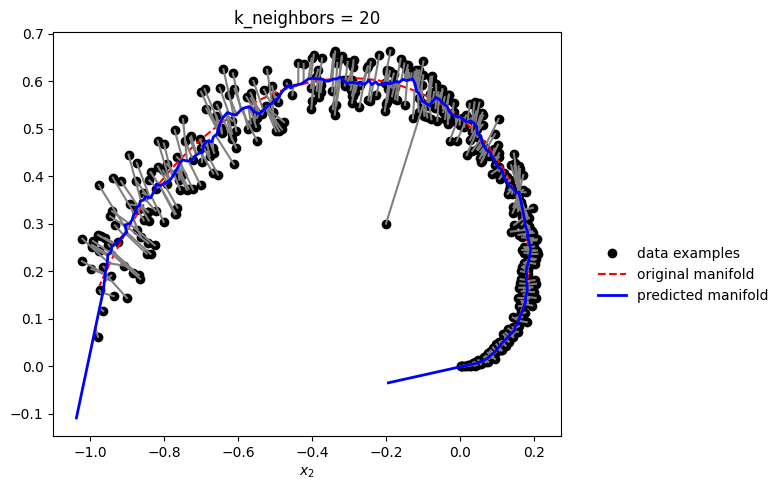

In [55]:
k_neighbors=20
plt.figure(figsize=(8,5))
plt.plot(y_tab[0,:],y_tab[1,:],'ok',label='data examples')
plt.plot(y_original[0,:],y_original[1,:],'--r',label='original manifold')

for i in range(len(y_tab[0])):
    embedded_point = embedding.transform(y_tab[:,i].reshape(1,-1))
    inverse_transform_point = inverse_transform_func(embedded_point,embedded_points,data,k_neighbors=k_neighbors).flatten()
    plt.plot([y_tab[0,i],inverse_transform_point[0]],[y_tab[1,i],inverse_transform_point[1]],'-',color='gray')
    #print(inverse_transform_point)
y_pred = inverse_transform_func_list(t_r_tab,embedded_points,data,k_neighbors=k_neighbors)
#plt.plot(y_pred_2[:,0],y_pred_2[:,1],'-',color='orange',label='predicted manifold',lw=2)
plt.plot(y_pred[:,0],y_pred[:,1],'-b',label='predicted manifold',lw=2)
plt.xlabel('$x_1$')
plt.xlabel('$x_2$')
plt.legend(bbox_to_anchor=(1.05, .5),loc='upper left',frameon=False)
plt.title('k_neighbors = %d'%k_neighbors)
plt.tight_layout()
plt.savefig('../../Presentations/img/courbe_para_prediction_%d.png'%k_neighbors)

# Exemple sur une vrai trajectoire

In [3]:
def plotSkeletonB(ax,bodyMarkers,connectionsMarkers=np.array([[0,1],\
                                              [1,2],[2,3],[3,4],\
                                              [1,5],[5,6],[6,7],\
                                              [1,8],[8,9],[9,10],\
                                              [1,11],[11,12],[12,13]]),
                th=0.3,
                color_val='red',alpha=1):
    '''
    fonction pour tracer un skelette sur un plot
    '''
    
    for i in range(len(connectionsMarkers)):
            a,b = connectionsMarkers[i,0],connectionsMarkers[i,1]
            x = [bodyMarkers[a,0],bodyMarkers[b,0]]
            y = [bodyMarkers[a,1],bodyMarkers[b,1]]
            ax.plot(x,y,'-',c=color_val,alpha=alpha)

In [4]:
def rescale_x(x_pixel):
    return (7800-x_pixel)/300+1
def rescale_y(x_pixel):
    return (600-x_pixel)/300

In [5]:
net_data = np.loadtxt('network_solution_2_Crawl_9.txt')
net_data=net_data[50*4:,:]

In [5]:
flag = net_data[:,4*3+3+2]>.3
x_hand_L = net_data[flag,4*3+3]
y_hand_L = net_data[flag,4*3+3+1]

x_hand_L_all =net_data[:,4*3+3]
y_hand_L_all =net_data[:,4*3+3+1]



flag = net_data[:,7*3+3+2]>.3
x_hand_R = net_data[flag,7*3+3]
y_hand_R = net_data[flag,7*3+3+1]

x_hand_R_all =net_data[:,7*3+3]
y_hand_R_all =net_data[:,7*3+3+1]

x_CM_all = net_data[:,1]
y_CM_all = net_data[:,2]

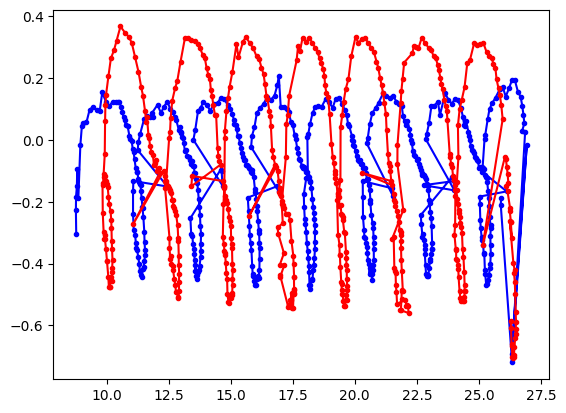

In [6]:
#plt.plot(rescale_x(x_hand_L),rescale_y(y_hand_L),'-b.')
plt.plot(rescale_x(x_hand_L_all),rescale_y(y_hand_L_all),'.-b')
#plt.plot(rescale_x(x_hand_L),rescale_y(y_hand_L),'-b.')
plt.plot(rescale_x(x_hand_R_all),rescale_y(y_hand_R_all),'.-r')
plt.show()

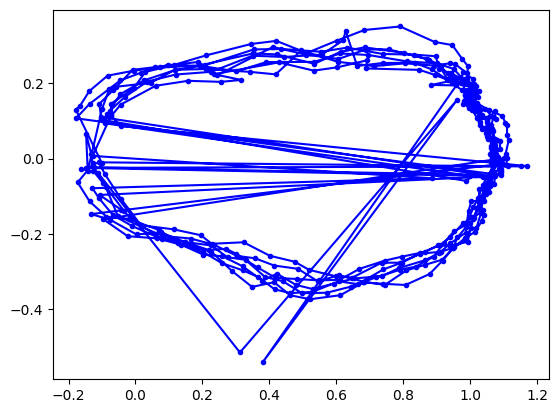

In [7]:
#plt.plot(rescale_x(x_hand_L),rescale_y(y_hand_L),'-b.')
plt.plot(rescale_x(x_hand_L_all)-rescale_x(x_CM_all),rescale_y(y_hand_L_all)-rescale_y(y_CM_all),'.-b')
plt.show()

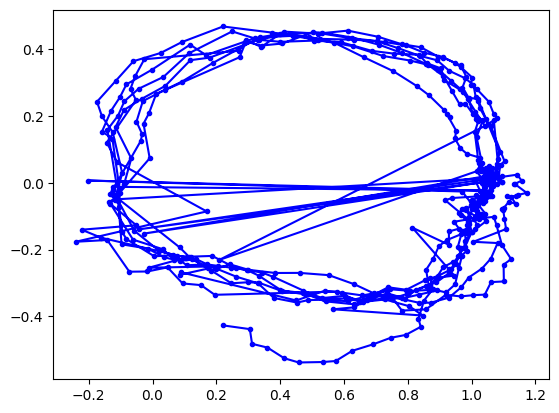

In [8]:
plt.plot(rescale_x(x_hand_R_all)-rescale_x(x_CM_all),rescale_y(y_hand_R_all)-rescale_y(y_CM_all),'.-b')
plt.show()

In [9]:
i=10
x_data = net_data[i,np.arange(3,3+14*3,3)]-net_data[i,1]
y_data = net_data[i,np.arange(3,3+14*3,3)+1]-net_data[i,2]

In [11]:
data = []

for i in range(len(net_data)):
    x_data = rescale_x(net_data[i,np.arange(3,3+14*3,3)])-rescale_x(net_data[i,1])
    y_data = rescale_y(net_data[i,np.arange(3,3+14*3,3)+1])-rescale_y(net_data[i,2])
    body_markers= np.vstack([x_data,y_data]).transpose()
    data.append(body_markers.flatten())

In [12]:
#for i in range(len(data)):
#    fig,ax=plt.subplots(ncols=1,figsize=(3*2,2))
#    body_markers=data[i].reshape(14,2)
#    body_markers[:,0] = body_markers[:,0]
#    body_markers[:,1] = body_markers[:,1]
#    plotSkeletonB(ax,body_markers)
#    ax.set_xlim(-1.5,1.5)
#    ax.set_ylim(-0.5,0.5)
#    ax.axis(False)
#    ax.set_aspect('equal')
#    fig.savefig('animation/%06d.png'%i)
#    plt.close()

In [13]:
data = np.array(data)

In [15]:
embedding = manifold.Isomap(n_components=2,n_neighbors=10)
X_transformed = embedding.fit_transform(data)

In [16]:
data.shape

(480, 28)

In [17]:
body_markers[:,0]

array([ 0.6047    ,  0.42136667,  0.5047    ,  0.72136667, -0.16196667,
        0.42136667,  0.13803333,  0.22136667, -0.12863333, -0.51196667,
       -1.01196667, -0.0953    , -0.51196667, -0.96196667])

In [18]:
for i in range(len(X_transformed)):
    fig,ax=plt.subplots(ncols=2,figsize=(10,5))
    ax[1].plot(X_transformed[:,0],X_transformed[:,1],'o')
    ax[1].plot(X_transformed[i,0],X_transformed[i,1],'ro')
    body_markers=data[i].reshape(14,2)
    plotSkeletonB(ax[0],body_markers)
    ax[0].set_xlim(-1.2,1.2)
    ax[0].set_ylim(-0.5,0.5)
    ax[0].axis(False)
    ax[0].set_aspect('equal')
    fig.savefig('reduction2/%06d.png'%i)
    plt.close()


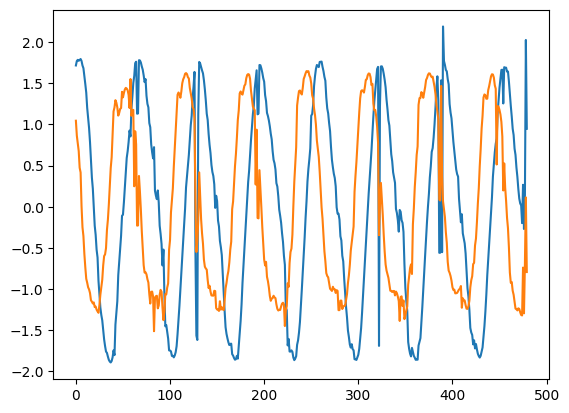

In [20]:
plt.plot(X_transformed[:,0])
plt.plot(X_transformed[:,1])